# AIRLINE TWITTER SENTIMENT PROJECT

**Presented by:** (Samuel Mbugua Igecha, Pauline Ndung'u, Jimcollins Wamae, Winfred Muthoni, Susan Warigia, Eston Kamau)
***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Business Understanding

In a competitive airline industry, it's imperative that sentiment analysis be used to gain an advantage. One way of doing this is by looking at customer feedback data through various sources like review sites and social media posts, in this case we'll be using twitter data.

Sentiment analysis in this case can determine whether the sentiment of the tweets is positive, negative, or neutral. This will give us valuable insights into customers' opinions and preferences, their complaints, and will then enable us to come up with strategies to ensure their satisfaction and loyalty.

According to an article from International Air Transport Association, think of them as like the NTSA of Kenya but for planes. Find article on this link [IATA]('https://airlines.iata.org/2014/05/22/impact-reputation'). It talks about the impact of reputation in the airline industry and how having a good reputation is a pre-requisite for success while a bad reputation is a nail in the coffin. This is a good reference point on the importance of sentiment analysis.

## 1.1 Objectives

1. To determine the overall sentiment (positive, negative, or neutral) of tweets related to different airlines. This helps in understanding the general perception and public sentiment towards specific airlines.
2. To assess the satisfaction levels of customers based on their tweets about their experiences with different airlines thus identifying positive and negative feedback to understand areas of improvement or strengths of each airline's customer service.

# Data Understanding

Data containing 14640 rows and 20 columns has been obtained from [data.world]('https://data.world/crowdflower/airline-twitter-sentiment') which is more than sufficient and robust enough to be used for our analysis.Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service")

# Data Preparation

In [ ]:
# Import relevant packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import re
import string
import json
import requests

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/airline_sentiment_2_w_aa.csv')
df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2015-02-25T05:24:00,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24T11:35:00,570306000000000000,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2015-02-25T01:53:00,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2015-02-25T10:01:00,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24T11:15:00,570301000000000000,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2015-02-25T03:05:00,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2015-02-25T05:50:00,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24T11:14:00,570301000000000000,NaN,Pacific Time (US & Canada)


### 1.1 Data Cleaning

In [ ]:
df.shape

(14640, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   unit_id                       14640 non-null  int64  
 1   golden                        14640 non-null  bool   
 2   unit_state                    14640 non-null  object 
 3   trusted_judgments             14640 non-null  int64  
 4   last_judgment_at              14584 non-null  object 
 5   airline_sentiment             14640 non-null  object 
 6   airline_sentiment_confidence  14640 non-null  float64
 7   negativereason                9178 non-null   object 
 8   negativereason_confidence     10522 non-null  float64
 9   airline                       14640 non-null  object 
 10  airline_sentiment_gold        40 non-null     object 
 11  name                          14640 non-null  object 
 12  negativereason_gold           32 non-null     object 
 13  r

In [ ]:
df.isnull().sum()

unit_id                             0
golden                              0
unit_state                          0
trusted_judgments                   0
last_judgment_at                   56
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_id                            0
tweet_location                   4733
user_timezone                    4820
dtype: int64

- For the negativereason column, we can't fill it with mode as that creates a mismatch with the airlinesentiment column. The negative reasons match with the negative sentiments. So we leave the column as it is, deleting the rows would lead to loss of important information and even affect model performance.

In [ ]:
df.isnull().sum() / len(df) * 100

unit_id                          0.000000
golden                           0.000000
unit_state                       0.000000
trusted_judgments                0.000000
last_judgment_at                 0.382514
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_id                         0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

airline_sentiment_gold and negativereason_gold have 99% missing data while tweet_coord has nearly 93% missing data. We will drop the columns. We will drop the rest of other columns later on after our EDA

In [ ]:
columns_to_drop = ['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord']
df = df.drop(columns_to_drop, axis=1)

In [ ]:
df.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_id,tweet_location,user_timezone
0,681448150,False,finalized,3,2015-02-25T05:24:00,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24T11:35:00,570306000000000000,NaN,Eastern Time (US & Canada)
1,681448153,False,finalized,3,2015-02-25T01:53:00,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
2,681448156,False,finalized,3,2015-02-25T10:01:00,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24T11:15:00,570301000000000000,Lets Play,Central Time (US & Canada)
3,681448158,False,finalized,3,2015-02-25T03:05:00,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24T11:15:00,570301000000000000,NaN,Pacific Time (US & Canada)
4,681448159,False,finalized,3,2015-02-25T05:50:00,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24T11:14:00,570301000000000000,NaN,Pacific Time (US & Canada)


In [ ]:
df.duplicated().sum()

0

### 1.2 Exploratory Data Analysis

In [ ]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

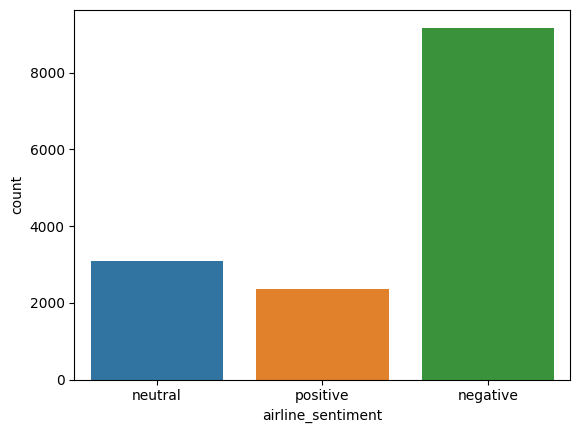

In [ ]:
# Visualization of target variable/airline sentiment
ax = sns.countplot(x = "airline_sentiment", data = df)

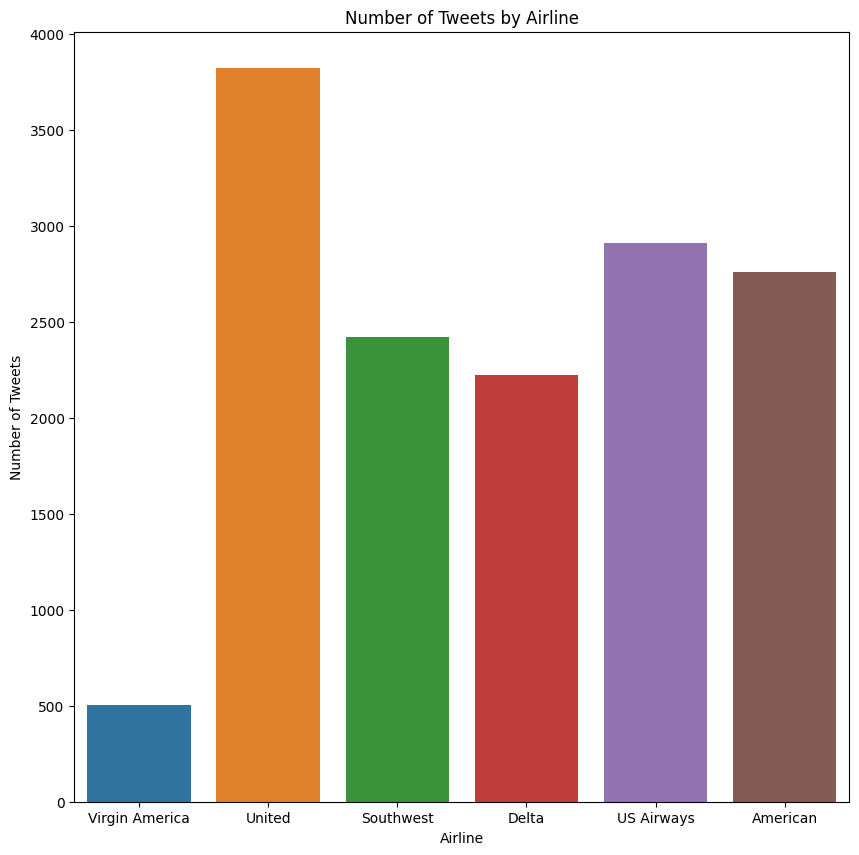

In [ ]:
plt.figure(figsize = (10, 10))
ax = sns.countplot(x = "airline",data = df)
# Add labels and title
ax.set_xlabel("Airline")
ax.set_ylabel("Number of Tweets")
ax.set_title("Number of Tweets by Airline")

plt.show()

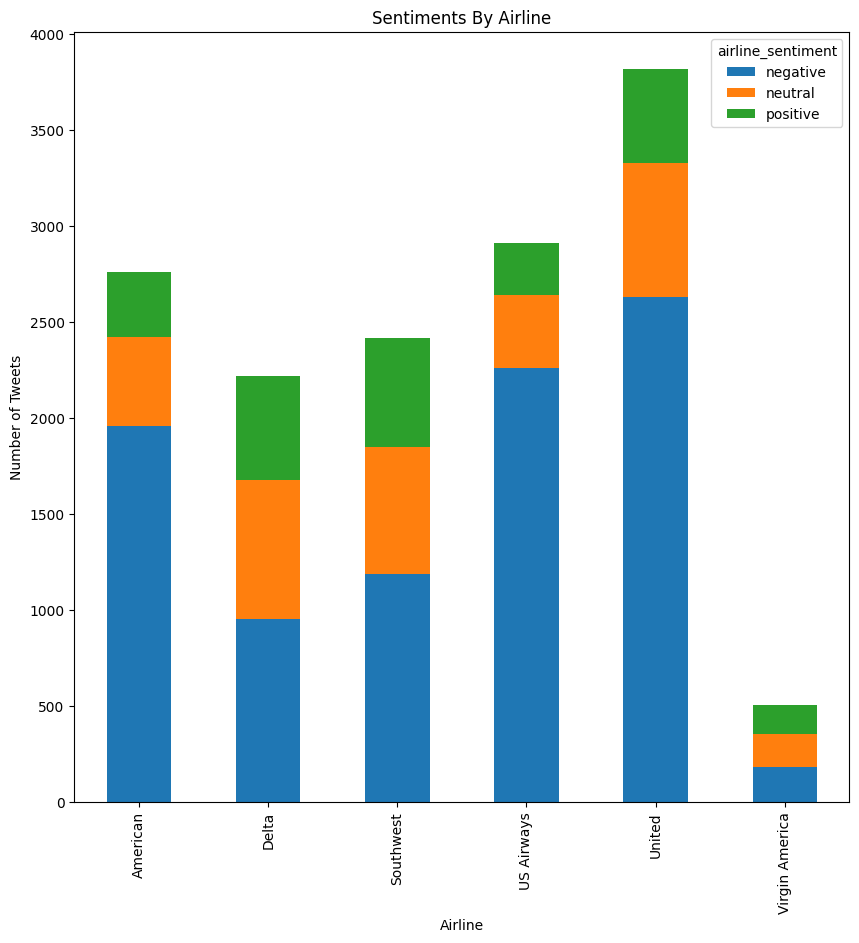

In [ ]:
grouped_data = df.groupby(['airline', 'airline_sentiment']).size()
grouped_data.unstack().plot(kind='bar', stacked=True, figsize=(10,10))
plt.xlabel('Airline')
plt.ylabel('Number of Tweets')
plt.title("Sentiments By Airline")
plt.show()

- United Airline comes first based on the number of the negative, neutral and positive sentiments followed by US Airways then American Airlines. Virgin America comes last

In [ ]:
negative_data = df.groupby(['airline', 'negativereason']).size().reset_index(name='count')
fig = px.bar(negative_data, x='airline', y='count', color='negativereason', barmode='stack')

# Customize the chart layout
fig.update_layout(
    title="Negative Reasons By Airline",
    xaxis_title="Airline",
    yaxis_title="Number of Tweets",
    legend_title="Negative Reason",
)

# Show the interactive plot
fig.show()

In [ ]:
negative_data = df.groupby(['airline', 'negativereason']).size().reset_index(name='count')

# Create pie chart
fig = go.Figure(data=[go.Pie(labels=negative_data['negativereason'], values=negative_data['count'])])

# Customize the chart layout
fig.update_layout(
    title="Negative Reasons for all Airlines (Pie Chart)",
)

# Show the pie chart
fig.show()

- 31.7% of tweets indicate poor customer service provided by various airlines. 18.1% indicate a bad experience with late flights and 13.0% of them indicate a dislike the services provided by the airlines without providing any solid reason. Issues concerning damaged luggage are the least.

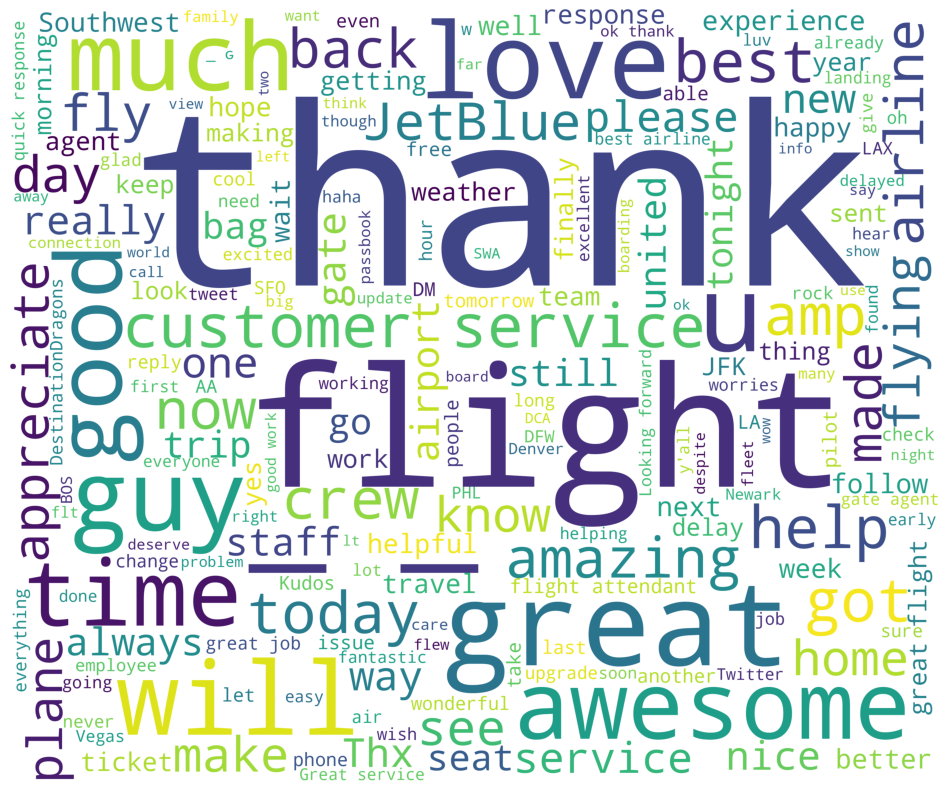

In [ ]:
new_df = df[df["airline_sentiment"] == "positive"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- The meaningful words that can be spotted in the positive sentiments’ word cloud directly include “thank”, “best”, “great” and “awesome”, "good".

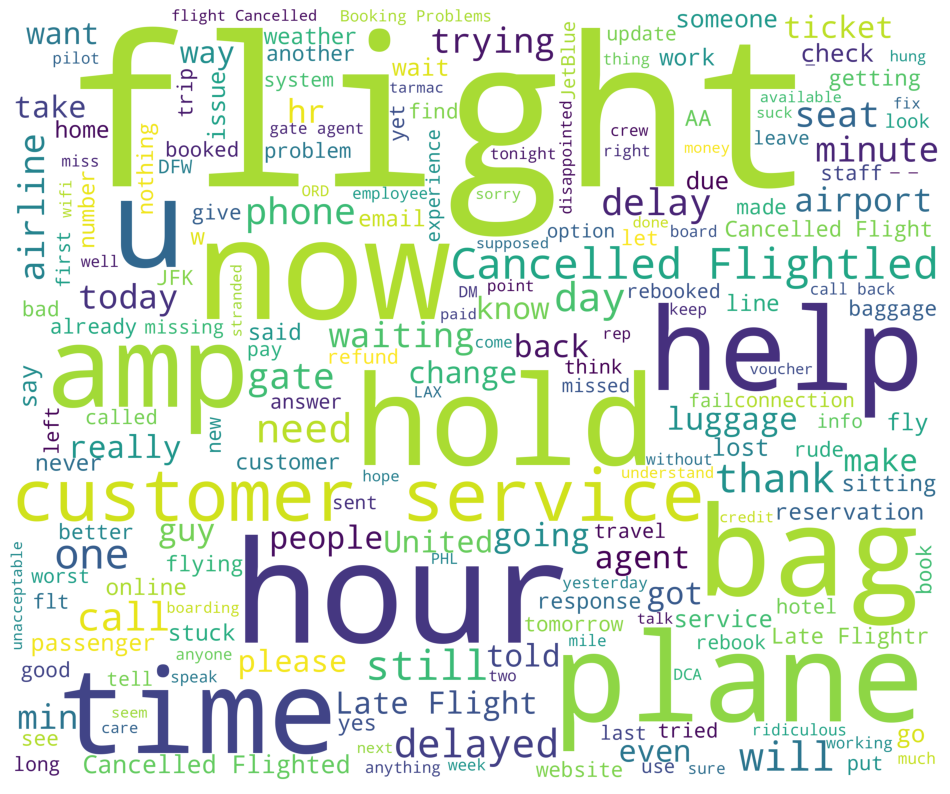

In [ ]:
new_df = df[df["airline_sentiment"] == "negative"]
words = " ".join(new_df["text"])
cleaned_word = " ".join([word for word in words.split() if "http" not in word and not word.startswith("@") and word != "RT"])
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = "white", width = 3000, height = 2500).generate(cleaned_word)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

- The meaningful words that can be spotted in the negative sentiments’ word cloud directly are “delay”, "customer service" , “cancelLed flight” and"Late Flight" etc.

- Overall, it seems that both word clouds display a lot of non-meaningful words at the same time as well like “PHL”, “help”, “time”, “today”, “will”, "LAX" etc.

In [ ]:
# Drop all other columns except text and airline_sentiment
df = df.loc[:, ['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


### 1.3 Text Preprocessing

The preprocessing and cleaning stages consists of removing the stopwords, removing twitter mentions e.g., @VirginAirlines, removing any links, punctuation, converting the data to lower case, Lematization etc

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    # Use list comprehension for efficient list creation
    new_text = [word for word in text.split() if word not in stop_words]
    return " ".join(new_text)

# Apply the function to the 'review' column
df['text'] = df['text'].apply(remove_stopwords)

In [ ]:
# tokenize the text
df['text'] = df.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
df.head()

,text,airline_sentiment
0,"[@, VirginAmerica, What, @, dhepburn, said, .]",neutral
1,"[@, VirginAmerica, plus, added, commercials, e...",positive
2,"[@, VirginAmerica, I, today, ..., Must, mean, ...",neutral
3,"[@, VirginAmerica, really, aggressive, blast, ...",negative
4,"[@, VirginAmerica, really, big, bad, thing]",negative


In [ ]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words


def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = lemmatize_list(words)
    return ' '.join(words)

df['text'] = df.apply(lambda row: normalize(row['text']), axis=1)
df.head()


,text,airline_sentiment
0,virginamerica what dhepburn say,neutral
1,virginamerica plus add commercials experience ...,positive
2,virginamerica i today must mean i need take an...,neutral
3,virginamerica really aggressive blast obnoxiou...,negative
4,virginamerica really big bad thing,negative
